# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.52e-06
Time:                        20:06:05   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

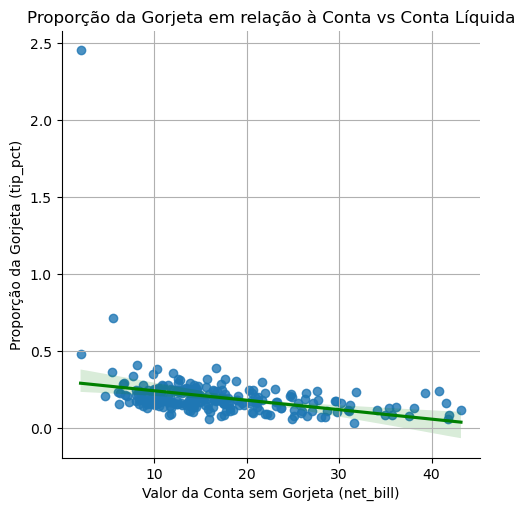

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

modelo = smf.ols('tip ~ net_bill', data=tips).fit()

modelo_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

print(modelo_pct.summary())

sns.lmplot(x='net_bill', y='tip_pct', data=tips, line_kws={'color': 'green'})
plt.title("Proporção da Gorjeta em relação à Conta vs Conta Líquida")
plt.xlabel("Valor da Conta sem Gorjeta (net_bill)")
plt.ylabel("Proporção da Gorjeta (tip_pct)")
plt.grid(True)
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.62e-13
Time:                        20:07:27   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

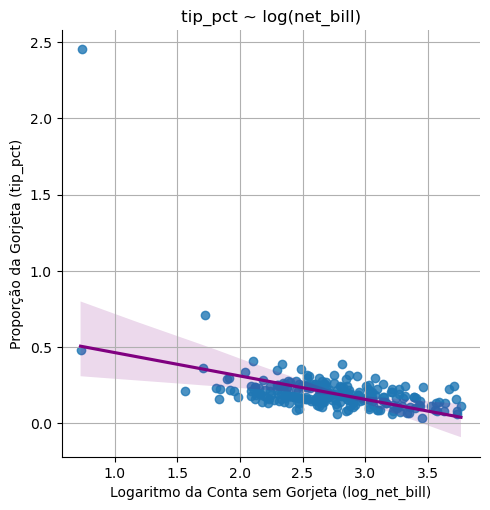

In [2]:
tips['log_net_bill'] = np.log(tips['net_bill'])

modelo_log = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()
print(modelo_log.summary())

sns.lmplot(x='log_net_bill', y='tip_pct', data=tips, line_kws={'color': 'purple'})
plt.title("tip_pct ~ log(net_bill)")
plt.xlabel("Logaritmo da Conta sem Gorjeta (log_net_bill)")
plt.ylabel("Proporção da Gorjeta (tip_pct)")
plt.grid(True)
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.06e-09
Time:                        20:08:24   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4851      0.047     10.332      

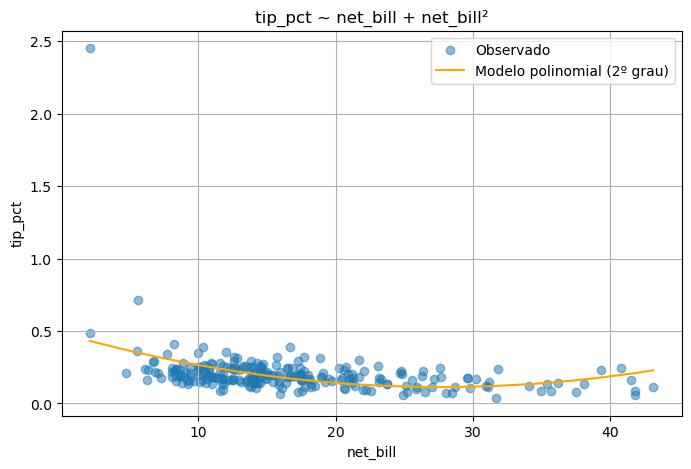

In [3]:
tips['net_bill_sq'] = tips['net_bill'] ** 2

modelo_poli = smf.ols('tip_pct ~ net_bill + net_bill_sq', data=tips).fit()
print(modelo_poli.summary())

tips_sorted = tips.sort_values(by='net_bill')

preds = modelo_poli.predict(tips_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(tips_sorted['net_bill'], tips_sorted['tip_pct'], alpha=0.5, label='Observado')
plt.plot(tips_sorted['net_bill'], preds, color='orange', label='Modelo polinomial (2º grau)')
plt.title('tip_pct ~ net_bill + net_bill²')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.legend()
plt.grid(True)
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [4]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])

modelo_log_tip_pct = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()
print(modelo_log_tip_pct.summary())

log_pred = modelo_log_tip_pct.fittedvalues

tip_pct_pred = np.exp(log_pred)

from sklearn.metrics import r2_score

r2_tip_pct_transformado = r2_score(tips['tip_pct'], tip_pct_pred)
print(f"R² em tip_pct (após transformar de volta): {r2_tip_pct_transformado:.4f}")


                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           8.27e-16
Time:                        20:09:31   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [5]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

modelo_loglog = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()
print(modelo_loglog.summary())

log_preds = modelo_loglog.fittedvalues
tip_pct_pred = np.exp(log_preds)

from sklearn.metrics import r2_score

r2_loglog_tip_pct = r2_score(tips['tip_pct'], tip_pct_pred)
print(f"R² em tip_pct (modelo log-log): {r2_loglog_tip_pct:.4f}")


                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.20e-20
Time:                        20:10:20   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

###  6. qual modelo resultou no melhor ajuste?